In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error
import pandas as pd


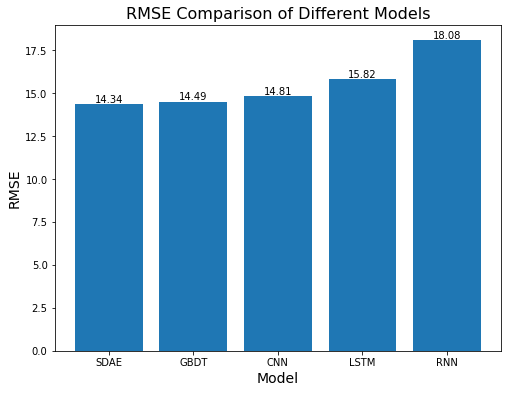

In [261]:
# model names and their corresponding RMSE values
models = ['GBDT', 'CNN', 'LSTM', 'SDAE', 'RNN']
rmse_values = [14.488147304127896, 14.805909461321166, 15.824401957347124, 14.343229918636734, 18.07896962019336]

# sort models and RMSE values in ascending order of RMSE
sorted_models_rmse = sorted(zip(rmse_values, models))
sorted_rmse_values, sorted_models = zip(*sorted_models_rmse)

plt.figure(figsize=(8, 6))
plt.bar(sorted_models, sorted_rmse_values)

for i in range(len(sorted_models)):
    plt.text(i, round(sorted_rmse_values[i], 2), round(sorted_rmse_values[i], 2), ha = 'center', va = 'bottom')

plt.title('RMSE Comparison of Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

plt.show()


GBDT : 14.488147304127896
CNN : 14.805909461321166
LSTM : 15.824401957347124
SDAE : 14.343229918636734
RNN : 18.07896962019336
TTM-Truncated : 1.1005491270474677
TTM : 0.35805942953756187


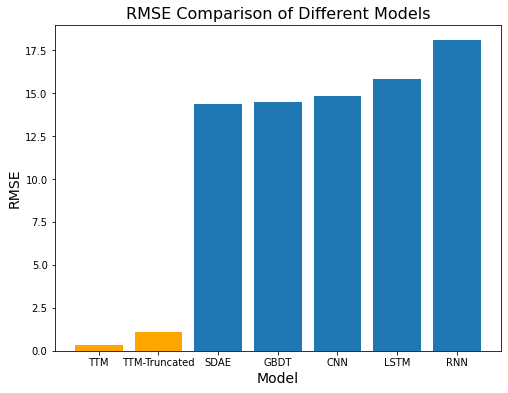

In [262]:
import matplotlib.pyplot as plt

# model names and their corresponding RMSE values
models = ['GBDT', 'CNN', 'LSTM', 'SDAE', 'RNN', 'TTM-Truncated', 'TTM']
rmse_values = [14.488147304127896, 14.805909461321166, 15.824401957347124, 
               14.343229918636734, 18.07896962019336, 1.1005491270474677, 0.35805942953756187]

for i, mod in enumerate(models):
    print(mod, ":", rmse_values[i])

# sort models and RMSE values in ascending order of RMSE
sorted_models_rmse = sorted(zip(rmse_values, models))
sorted_rmse_values, sorted_models = zip(*sorted_models_rmse)

# Assign colors with 'orange' for TTM and TTM-Truncated, others as default color
colors = ['orange' if model in ['TTM', 'TTM-Truncated'] else '#1f77b4' for model in sorted_models]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(sorted_models, sorted_rmse_values, color=colors)

plt.title('RMSE Comparison of Different Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

plt.show()


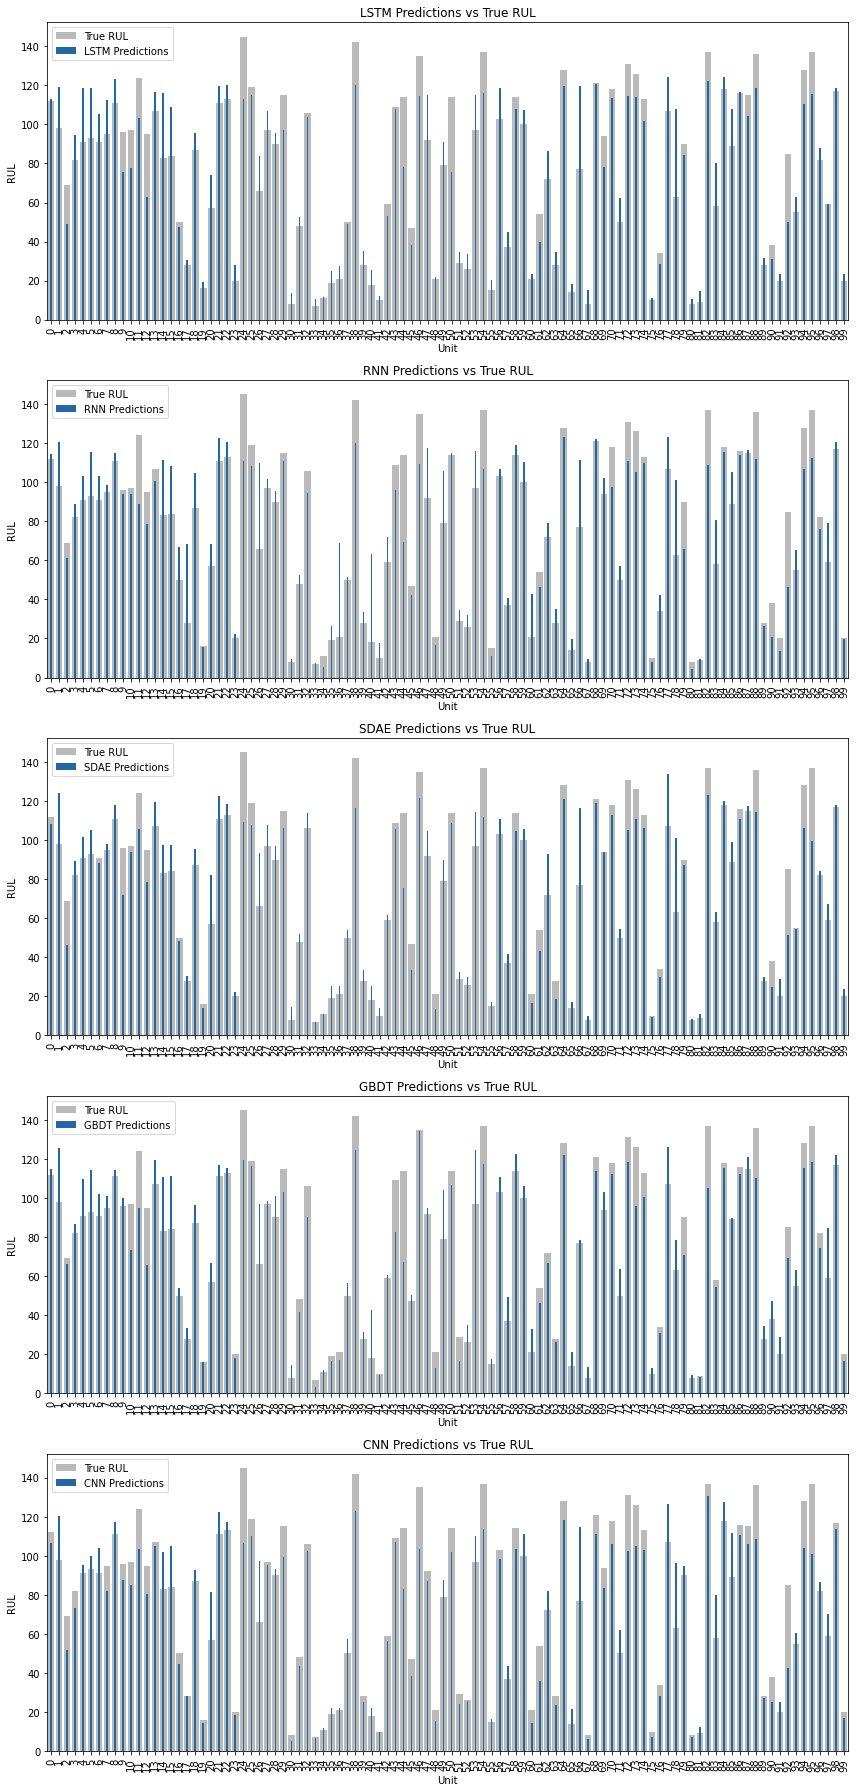

In [263]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the .npy files into arrays
lstm_predictions = np.load('../models/LSTM/lstm_predictions.npy').ravel()
rnn_predictions = np.load('../models/RNN/rnn_predictions.npy').ravel()
sdae_predictions = np.load('../models/SDAE/sdae_predictions.npy').ravel()
gbdt_predictions = np.load('../models/GBDT/GBDT_model_trained_test_predictions.npy').ravel()
cnn_predictions = np.load('../models/CNN/CNN_model_trained_test_predictions.npy').ravel()

# Load the true RUL from the pickle file
folder_path = '../data/batched_data_pickle_files/true_rul.pkl'
with open(folder_path, 'rb') as file:
    true_rul = np.array(pickle.load(file)).ravel()

# Create subplots (5 rows, 1 column)
fig, axes = plt.subplots(5, 1, figsize=(12, 25))

# Plot bar charts for each model
models = {
    "LSTM": lstm_predictions,
    "RNN": rnn_predictions,
    "SDAE": sdae_predictions,
    "GBDT": gbdt_predictions,
    "CNN": cnn_predictions
}

for ax, (model_name, predictions) in zip(axes, models.items()):
    # Create the bar plot for True RUL with lighter gray bars
    sns.barplot(x=np.arange(len(true_rul)), y=true_rul, ax=ax, color="#bababa", label="True RUL", width=0.8)
    
    # Overlay the prediction bars
    sns.barplot(x=np.arange(len(predictions)), y=predictions, ax=ax, color="#0f69b8", label=f"{model_name} Predictions", width=0.22)
    
    # Rotate x-axis labels
    ax.set_xticks(np.arange(len(true_rul)))
    ax.set_xticklabels(np.arange(len(true_rul)), rotation=90)
    
    ax.set_title(f"{model_name} Predictions vs True RUL")
    ax.set_ylabel("RUL")
    ax.set_xlabel("Unit")
    ax.legend()

plt.tight_layout()
plt.show()


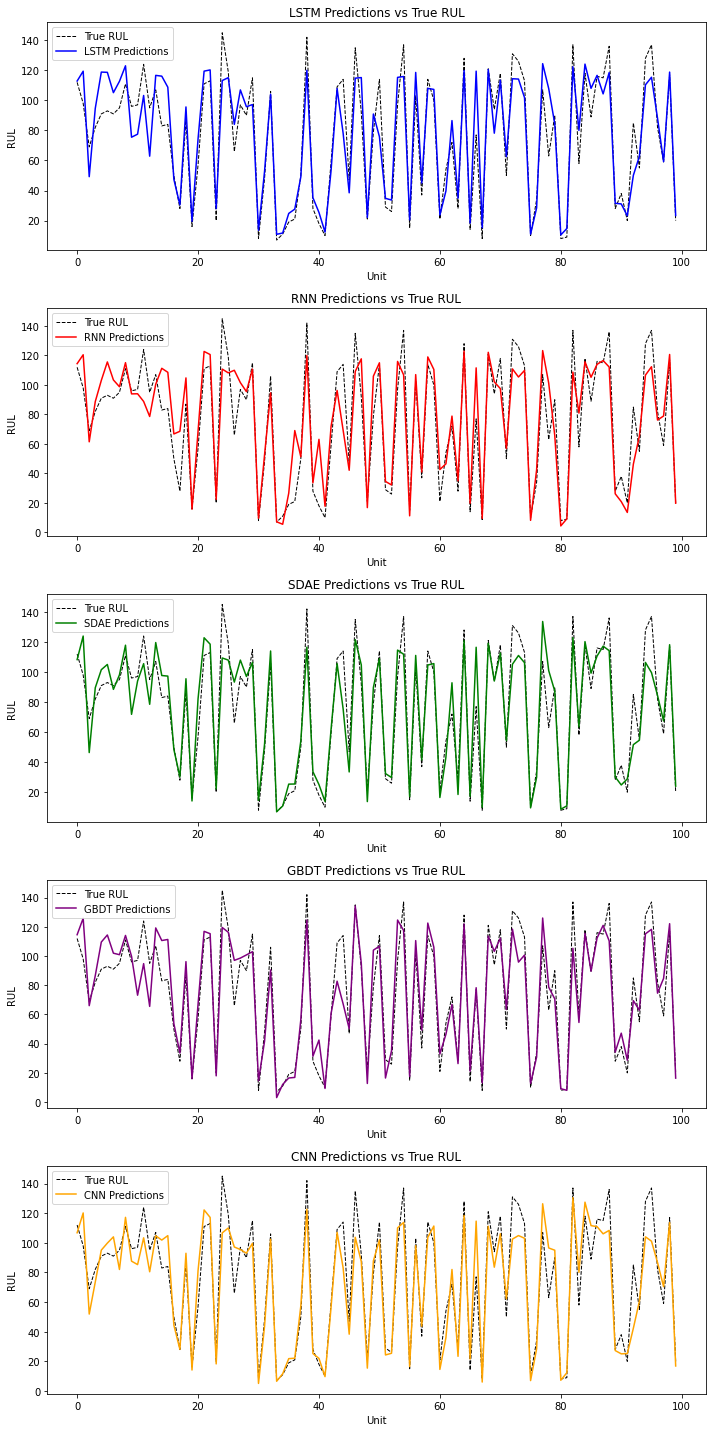

In [264]:
# Load the .npy files into arrays
lstm_predictions = np.load('../models/lstm/lstm_predictions.npy').ravel()
rnn_predictions = np.load('../models/rnn/rnn_predictions.npy').ravel()
sdae_predictions = np.load('../models/sdae/sdae_predictions.npy').ravel()
gbdt_predictions = np.load('../models/gbdt/GBDT_model_trained_test_predictions.npy').ravel()
cnn_predictions = np.load('../models/cnn/CNN_model_trained_test_predictions.npy').ravel()

# load the true RUL from the pickle file
folder_path = '../data/batched_data_pickle_files/true_rul.pkl'
with open(folder_path, 'rb') as file:
    true_rul = pickle.load(file)

true_rul = np.array(true_rul)

# ceate subplots (5 rows, 1 column)
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

# plot each prediction vs true RUL on individual subplots
axes[0].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=1)
axes[0].plot(lstm_predictions, label='LSTM Predictions', color='blue')
axes[0].set_title('LSTM Predictions vs True RUL')
axes[0].set_ylabel('RUL')
axes[0].set_xlabel('Unit') 
axes[0].legend()

axes[1].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=1)
axes[1].plot(rnn_predictions, label='RNN Predictions', color='red')
axes[1].set_title('RNN Predictions vs True RUL')
axes[1].set_ylabel('RUL')
axes[1].set_xlabel('Unit')  
axes[1].legend()

axes[2].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=1)
axes[2].plot(sdae_predictions, label='SDAE Predictions', color='green')
axes[2].set_title('SDAE Predictions vs True RUL')
axes[2].set_ylabel('RUL')
axes[2].set_xlabel('Unit')  
axes[2].legend()

axes[3].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=1)
axes[3].plot(gbdt_predictions, label='GBDT Predictions', color='purple')
axes[3].set_title('GBDT Predictions vs True RUL')
axes[3].set_ylabel('RUL')
axes[3].set_xlabel('Unit')  
axes[3].legend()

axes[4].plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=1)
axes[4].plot(cnn_predictions, label='CNN Predictions', color='orange')
axes[4].set_title('CNN Predictions vs True RUL')
axes[4].set_ylabel('RUL')
axes[4].set_xlabel('Unit')  
axes[4].legend()

plt.tight_layout()  
plt.show()


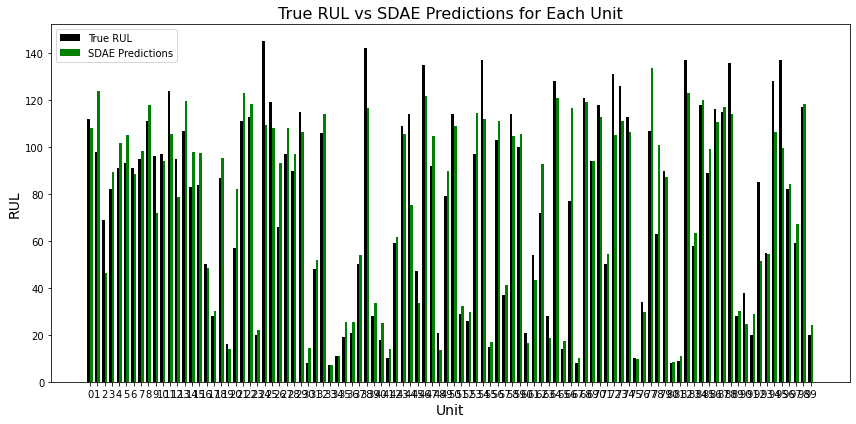

In [265]:
# load the .npy file for SDAE predictions
sdae_predictions = np.load('../models/sdae/sdae_predictions.npy')

# load the true RUL from the pickle file
folder_path = '../data/batched_data_pickle_files/true_rul.pkl'
with open(folder_path, 'rb') as file:
    true_rul = pickle.load(file)

# ensure that the true RUL data is in a numpy array format
true_rul = np.array(true_rul)

# number of units
num_units = len(true_rul)

# set the positions of the bars on the x-axis
indices = np.arange(num_units)

# set the width of the bars
bar_width = 0.35

# create the bar chart
plt.figure(figsize=(12, 6))

# plot the bars for true RUL and SDAE predictions
plt.bar(indices, true_rul, bar_width, label='True RUL', color='black')
plt.bar(indices + bar_width, sdae_predictions, bar_width, label='SDAE Predictions', color='green')

plt.title('True RUL vs SDAE Predictions for Each Unit', fontsize=16)
plt.xlabel('Unit', fontsize=14)
plt.ylabel('RUL', fontsize=14)

plt.legend()

plt.xticks(indices + bar_width / 2, indices)

plt.tight_layout()

plt.show()


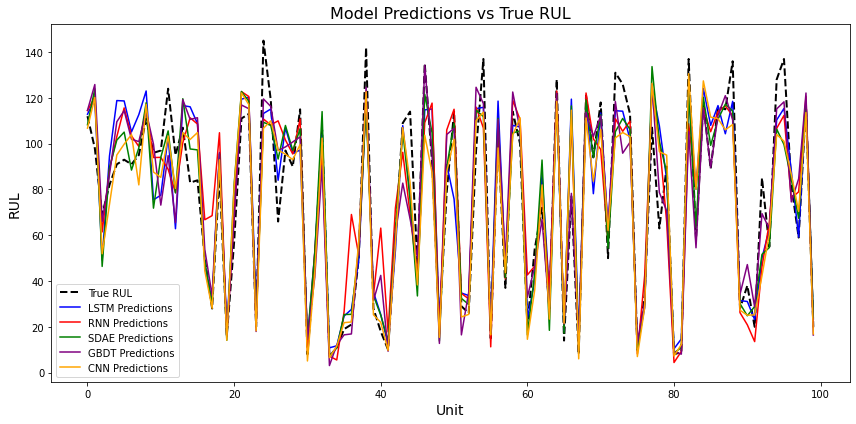

In [266]:
plt.figure(figsize=(12, 6))

# plot true RUL and model predictions
plt.plot(true_rul, label='True RUL', color='black', linestyle='--', linewidth=2)
plt.plot(lstm_predictions, label='LSTM Predictions', color='blue')
plt.plot(rnn_predictions, label='RNN Predictions', color='red')
plt.plot(sdae_predictions, label='SDAE Predictions', color='green')
plt.plot(gbdt_predictions, label='GBDT Predictions', color='purple')
plt.plot(cnn_predictions, label='CNN Predictions', color='orange')

plt.title('Model Predictions vs True RUL', fontsize=16)
plt.xlabel('Unit', fontsize=14)
plt.ylabel('RUL', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


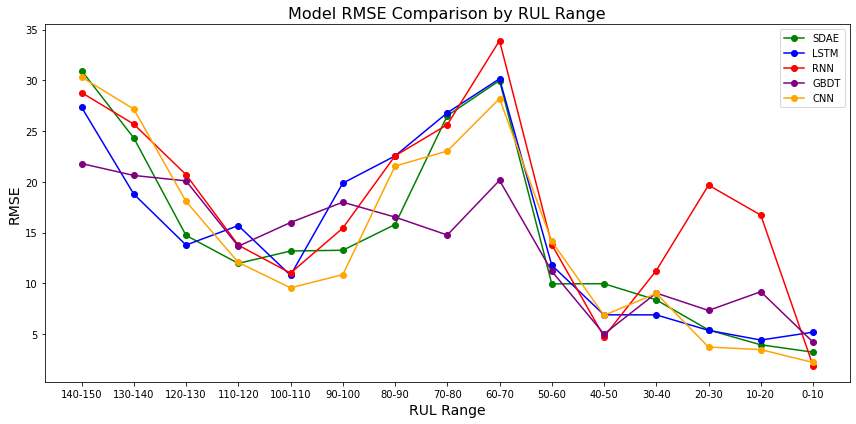

In [268]:
# load the .npy file for SDAE predictions
sdae_predictions = np.load('../models/sdae/sdae_predictions.npy')
lstm_predictions = np.load('../models/lstm/lstm_predictions.npy')
rnn_predictions = np.load('../models/rnn/rnn_predictions.npy')
gbdt_predictions = np.load('../models/gbdt/GBDT_model_trained_test_predictions.npy')
cnn_predictions = np.load('../models/cnn/CNN_model_trained_test_predictions.npy')

# load the true RUL from the pickle file
folder_path = '../data/batched_data_pickle_files/true_rul.pkl'
with open(folder_path, 'rb') as file:
    true_rul = pickle.load(file)

# ensure the true RUL data is in numpy array format
true_rul = np.array(true_rul)

# define the RUL intervals (e.g., 0-10, 10-20, etc)
rul_intervals = np.arange(0, np.max(true_rul) + 10, 10)  # create intervals of size 10

# print(rul_intervals)

# function to compute RMSE for each model in a given RUL interval
def compute_rmse_for_intervals(true_rul, predictions, intervals):
    rmse_values = []
    for i in range(len(intervals) - 1):
        # Select the indices for the current interval
        interval_mask = (true_rul >= intervals[i]) & (true_rul < intervals[i+1])
        
#         print("CURRENT INTERVAL: ", intervals[i], " TO ", intervals[i+1])
        
        # Get the true RUL and predictions for this interval
        interval_true_rul = true_rul[interval_mask]
        interval_predictions = predictions[interval_mask]
        
#         print("NUMBER OF ENGINES IN INTERVAL: ", len(interval_true_rul))
#         print('TRUE VERSUS ACTUAL: ', interval_true_rul, interval_predictions)
        
        # Calculate RMSE for this interval
        rmse = np.sqrt(mean_squared_error(interval_true_rul, interval_predictions))
        rmse_values.append(rmse)
        
#         print("\n")
    
    return rmse_values

# calculate RMSE for each model in each RUL interval
sdae_rmse = compute_rmse_for_intervals(true_rul, sdae_predictions, rul_intervals)
# print("SDAE RMSE VALUES FOR INTERVAL: ", sdae_rmse)
lstm_rmse = compute_rmse_for_intervals(true_rul, lstm_predictions, rul_intervals)
rnn_rmse = compute_rmse_for_intervals(true_rul, rnn_predictions, rul_intervals)
gbdt_rmse = compute_rmse_for_intervals(true_rul, gbdt_predictions, rul_intervals)
cnn_rmse = compute_rmse_for_intervals(true_rul, cnn_predictions, rul_intervals)

# plot the RMSE for each model in each RUL interval
plt.figure(figsize=(12, 6))

# plot RMSE for each model
plt.plot(rul_intervals[:-1], sdae_rmse, label='SDAE', marker='o', linestyle='-', color='green')
plt.plot(rul_intervals[:-1], lstm_rmse, label='LSTM', marker='o', linestyle='-', color='blue')
plt.plot(rul_intervals[:-1], rnn_rmse, label='RNN', marker='o', linestyle='-', color='red')
plt.plot(rul_intervals[:-1], gbdt_rmse, label='GBDT', marker='o', linestyle='-', color='purple')
plt.plot(rul_intervals[:-1], cnn_rmse, label='CNN', marker='o', linestyle='-', color='orange')

plt.title('Model RMSE Comparison by RUL Range', fontsize=16)
plt.xlabel('RUL Range', fontsize=14)
custom_ticks = ["0-10", "10-20", "20-30", "30-40", "40-50", 
                "50-60", "60-70", "70-80", "80-90", "90-100", 
                "100-110", "110-120", "120-130", "130-140", "140-150"]
plt.xticks(np.arange(0, 150, 10), custom_ticks)
plt.ylabel('RMSE', fontsize=14)
plt.legend()

# invert the x-axis to show higher RUL values on the left
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()


## Setting Custom Intervals to Explore RMSE of Bins

In [275]:
custom_intervals = [0, 20, 40, 60, 80, 100, 120, 140, 160]
predictions = sdae_predictions

binned_rmse = compute_rmse_for_intervals(true_rul, predictions, custom_intervals)

In [276]:
for i in range(len(sdae_rmse)):
    if i == 0:
        print("For RULs under", custom_intervals[i+1], ", RMSE =", sdae_rmse[i])
    else:
        print("For RULs between", custom_intervals[i], "and", custom_intervals[i+1], ", RMSE =", sdae_rmse[i])

For RULs under 20 , RMSE = 3.673507870608033
For RULs between 20 and 40 , RMSE = 6.110880534659975
For RULs between 40 and 60 , RMSE = 9.94490667330778
For RULs between 60 and 80 , RMSE = 28.30186289632936
For RULs between 80 and 100 , RMSE = 14.149328591596747
For RULs between 100 and 120 , RMSE = 12.321796394207562
For RULs between 120 and 140 , RMSE = 20.522488544523743
For RULs between 140 and 160 , RMSE = 30.966385457533914


## Plotting Difference in RUL Values

Equal RUL's are averaged. Lower and upper bounds for intervals can be set. 

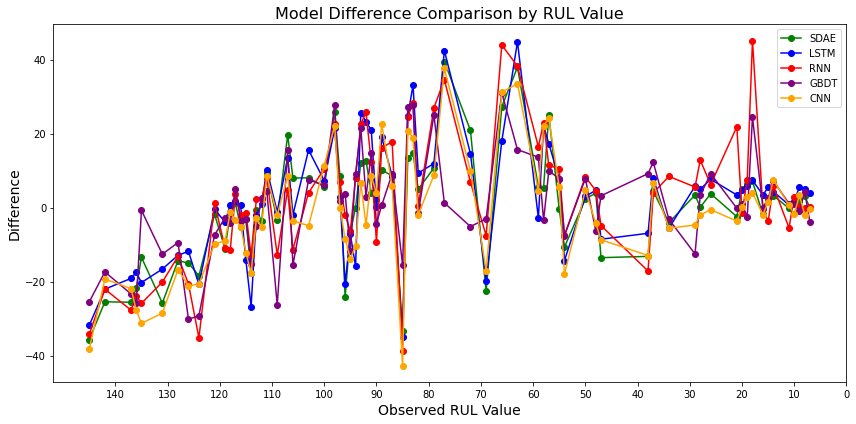

In [277]:
lower_bound = 0
upper_bound = 100
df = pd.DataFrame(true_rul, columns = ["True RUL"])
df["SDAE"] = sdae_predictions
df["CNN"] = cnn_predictions
df["RNN"] = rnn_predictions
df["GBDT"] = gbdt_predictions
df["LSTM"] = lstm_predictions

df = df.sort_values("True RUL")
df = df.groupby("True RUL", as_index = False).mean()

df["SDAE_diff"] = df["SDAE"] - df["True RUL"]
df["CNN_diff"] = df["CNN"] - df["True RUL"]
df["RNN_diff"] = df["RNN"] - df["True RUL"]
df["GBDT_diff"] = df["GBDT"] - df["True RUL"]
df["LSTM_diff"] = df["LSTM"] - df["True RUL"]

df = df[lower_bound:upper_bound]

# plot the absolute difference for each model at each available RUL
plt.figure(figsize=(12, 6))

# plot RMSE for each model
plt.plot(df["True RUL"], df['SDAE_diff'], label='SDAE', marker='o', linestyle='-', color='green')
plt.plot(df["True RUL"], df['LSTM_diff'], label='LSTM', marker='o', linestyle='-', color='blue')
plt.plot(df["True RUL"], df['RNN_diff'], label='RNN', marker='o', linestyle='-', color='red')
plt.plot(df["True RUL"], df['GBDT_diff'], label='GBDT', marker='o', linestyle='-', color='purple')
plt.plot(df["True RUL"], df['CNN_diff'], label='CNN', marker='o', linestyle='-', color='orange')

plt.title('Model Difference Comparison by RUL Value', fontsize=16)
plt.xticks(np.arange(0, 150, 10))
plt.xlabel('Observed RUL Value', fontsize=14)
plt.ylabel('Difference', fontsize=14)
plt.legend()

# invert the x-axis to show higher RUL values on the left
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

# Plotting Absolute Difference in RUL Values

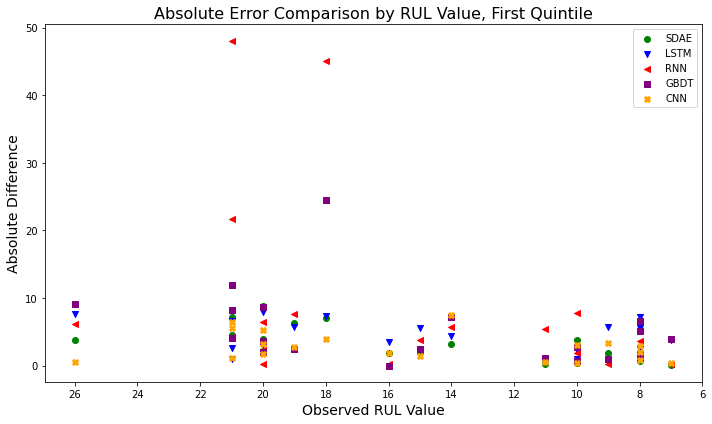

In [280]:
lower_bound = 0
upper_bound = 20
df = pd.DataFrame(true_rul, columns = ["True RUL"])

df["SDAE"] = sdae_predictions
df["CNN"] = cnn_predictions
df["RNN"] = rnn_predictions
df["GBDT"] = gbdt_predictions
df["LSTM"] = lstm_predictions

df = df.sort_values("True RUL")
df = df.iloc[0:20, :]
#df = df.groupby("True RUL", as_index = False).mean()
#display(df)
df["SDAE_diff"] = abs(df["SDAE"] - df["True RUL"])
df["CNN_diff"] = abs(df["CNN"] - df["True RUL"])
df["RNN_diff"] = abs(df["RNN"] - df["True RUL"])
df["GBDT_diff"] = abs(df["GBDT"] - df["True RUL"])
df["LSTM_diff"] = abs(df["LSTM"] - df["True RUL"])

df = df[lower_bound:upper_bound]

# plot the absolute difference for each model at each available RUL
plt.figure(figsize=(10, 6))

# plot RMSE for each model
plt.scatter(df["True RUL"], df['SDAE_diff'], label='SDAE', marker='o', linestyle='-', color='green')
plt.scatter(df["True RUL"], df['LSTM_diff'], label='LSTM', marker='v', linestyle='-', color='blue')
plt.scatter(df["True RUL"], df['RNN_diff'], label='RNN', marker='<', linestyle='-', color='red')
plt.scatter(df["True RUL"], df['GBDT_diff'], label='GBDT', marker='s', linestyle='-', color='purple')
plt.scatter(df["True RUL"], df['CNN_diff'], label='CNN', marker='X', linestyle='-', color='orange')

plt.title('Absolute Error Comparison by RUL Value, First Quintile', fontsize=16)
plt.xlabel('Observed RUL Value', fontsize=14)
plt.xticks(np.arange(6, 27, 2))
plt.ylabel('Absolute Difference', fontsize=14)
plt.legend()

# invert the x-axis to show higher RUL values on the left
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

## Determining Quintiles and Stats for those Quintiles

Can also change "division" variable to view different data ranges. 

In [281]:
division = 5
df = pd.DataFrame(true_rul, columns = ["True RUL"])
df["SDAE"] = sdae_predictions
df["CNN"] = cnn_predictions
df["RNN"] = rnn_predictions
df["GBDT"] = gbdt_predictions
df["LSTM"] = lstm_predictions

df = df.sort_values("True RUL")
df['division'] = pd.qcut(df["True RUL"], q = division, labels = False)

mapper = {"RMSE_SDAE":[], "RMSE_CNN": [], "RMSE_RNN": [], "RMSE_GBDT": [], "RMSE_LSTM": [], "min": [], "max": []}

for div in df['division'].unique():
    temp = df[df['division'] == div]
    mapper["min"].append(temp["True RUL"].min().item())
    mapper["max"].append(temp["True RUL"].max().item())
    for fld in df.columns[1:6]:
        r = np.sqrt(mean_squared_error(temp['True RUL'], temp[fld]))
        mapper["RMSE_" + fld].append(r.item())

#         print(div, fld, r)
#     print(mapper, "\n")

df = pd.DataFrame(mapper)
del temp, division, mapper, r

df

,RMSE_SDAE,RMSE_CNN,RMSE_RNN,RMSE_GBDT,RMSE_LSTM,min,max
0,4.369775,3.423281,16.026433,7.627841,4.919915,7,26
1,12.002016,12.858134,16.378813,9.768481,13.503537,28,63
2,16.724978,18.104826,21.777417,16.825963,22.105813,66,95
3,15.593551,12.427467,14.297477,18.039678,17.129960,96,114
4,18.460387,20.691315,20.419795,17.014633,15.926184,115,145


## Exploring specific CNN results

The below takes the final tuning group from the CNN analysis and plots the results. That tuning group only attempted two modeling architectures, which only had one difference: number of dense neurons in the final hidden layer of the neural network.

This final tuning group was ran to check the variation that occurs in training identical models on the same data. 

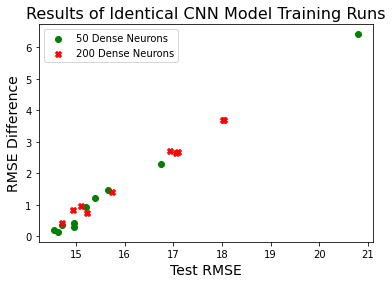

In [284]:
df = pd.read_csv("../models/CNN/CNN_log.csv")
df = df[df["tuning_group"] == 11]
df = df [['train_RMSE',
       'test_RMSE', 
       'dense_neurons']]
df['diff'] = df['test_RMSE'] - df['train_RMSE']
df
x1 = df[df["dense_neurons"] == 50]
x2 = df[df["dense_neurons"] == 200]

plt.scatter(x1['test_RMSE'], x1['diff'], label = "50 Dense Neurons", marker = "o", linestyle = "-", color = 'green')
plt.scatter(x2['test_RMSE'], x2['diff'], label = "200 Dense Neurons", marker = "X", linestyle = "-", color = 'red')

plt.title('Results of Identical CNN Model Training Runs', fontsize=16)
plt.xlabel('Test RMSE', fontsize=14)
plt.ylabel('RMSE Difference', fontsize=14)
plt.legend()

plt.show()

## DF that can be used to explore the results

The cell below is intended for user interaction to explore the data. It is not meant to be reproducible. 

In [285]:
df = pd.DataFrame(true_rul, columns = ["True RUL"])
df["SDAE"] = sdae_predictions
df["CNN"] = cnn_predictions
df["RNN"] = rnn_predictions
df["GBDT"] = gbdt_predictions
df["LSTM"] = lstm_predictions

df = df.sort_values("True RUL").reset_index(drop = True)
df.iloc[0:20,:]

,True RUL,SDAE,CNN,RNN,GBDT,LSTM
0,7,6.978405,6.557400,7.202366,3.084086,10.835603
1,8,14.598867,5.088395,9.623049,14.619265,13.496455
2,8,8.629679,7.240274,4.412161,9.170398,10.422183
3,8,9.975043,6.023221,9.503050,13.172907,15.128983
4,9,10.925975,12.301625,9.262093,8.072129,14.710201
5,10,9.574430,7.007918,8.187231,12.755627,10.924920
6,10,13.852671,9.687651,17.780584,9.343255,12.333318
7,11,10.785847,11.595617,5.529621,12.099064,11.698952
8,14,17.267864,21.546482,19.756451,21.214907,18.352163
9,15,17.023788,16.477783,11.259876,17.517172,20.504099
